<a href="https://colab.research.google.com/github/emirhanaktas/sistemlab-data789perceptron/blob/main/data789_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [ ]:
df = pandas.read_csv('https://raw.githubusercontent.com/irhallac/SisLab/main/hw_data/data_789.csv', header=None)


In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,NaN,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,ozellik-6,ozellik-7,cikis
1,0.0,-1.4080093652163415,-7.6656452619446025,-7.238232614974349,8.27005204886454,2.316332076510735,7.78069725994181,8.746140758288522,1
2,1.0,-2.3607238576457528,9.518346596580436,1.8483606179808003,9.62115643470663,-8.37008940851254,1.6157250616275787,7.208178980641894,0
3,2.0,-3.6768645865711664,9.766196950795905,0.8032334518724678,7.475693012048605,-8.519747478526474,4.371835533376637,5.475342832122751,0
4,3.0,-3.5360115449773155,7.943393253823311,2.466308517360952,7.327269280782561,-8.002647507690526,2.893346486968285,6.109700648700899,0
...,...,...,...,...,...,...,...,...,...
138,137.0,-4.2828928159065995,9.610162187361816,1.1204592530576047,7.917081727180424,-6.93999247648068,6.1208119781494705,4.27027460709047,0
139,138.0,-0.49861610166772463,-8.679843404948713,-10.801956967184243,8.672718658806925,3.7473853639137893,7.374688422411102,11.400780726988502,1
140,139.0,-2.500175785722042,-7.915534378731315,-6.377663194153808,7.059154817380378,3.5377739302046507,6.958497655165187,8.028975801492967,1
141,140.0,-2.939196147021269,10.093756985699981,0.27979067121290424,9.513667229485844,-8.557074490770898,2.188721060308475,6.379760417603098,0


In [41]:
cikis = df.iloc[1:100, 8].values #1 ile 100 elemanı alarak 8 özelliği verdik. 
giris = df.iloc[1:100, [2, 3, 7]].values # 2,3 ve 7. özellikleri giris olarak belirledik.

giris = giris.astype(float) #bize gelen degerler string olduğu için float'a dönüştürdük.
cikis = cikis.astype(float)

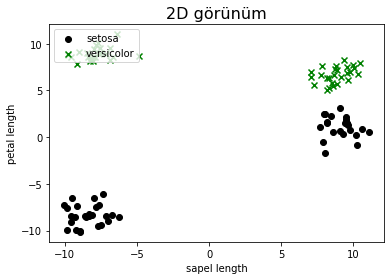

In [42]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:50, 0], giris[:50, 1], color='black', marker='o', label='setosa')
plt.scatter(giris[50:100, 0], giris[50:100, -1], color='green', marker='x', label='versicolor')
plt.xlabel('sapel length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.show()

In [58]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

        #ogrenme oranı ve iterasyon sayisini atadık.

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #ağırlık değerleri ve bias değerleri belirlenir.
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, 0) # çıkış değerlerimiz 0-1 olduğundan dolayı

In [59]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10) #siniflandiricimiza öğrenme oranı ve iterasyon sayısını verdik.

In [60]:
siniflandirici.ogren(giris, cikis)

In [61]:
siniflandirici.w
     

array([ 0.        , -1.58843964, -1.20818769,  0.38088753])

In [65]:
siniflandirici.hatalar # 1. iterasyondan sonra hata değerimiz 0'a indi.

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

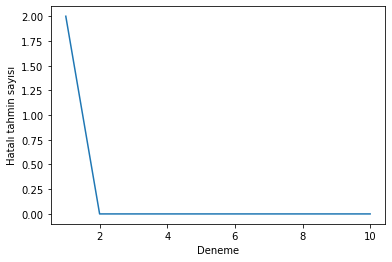

In [66]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()

In [64]:
#185260009 - EMİRHAN AKTAŞ